In [12]:
import matplotlib.pyplot as plt
import pandas as pd, datetime as dt
import scipy.stats as st

#read data and preview it
df = pd.read_csv('https://query.data.world/s/254wzyu352gsbcze7tu3pckdjuuhm3')
df.head()

C:\Users\jenna\anaconda\anaconda3\envs\PythonData38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,4604,Winona,Minnesota,2021-06-05,America,New York Times,0,27169.0,USA,United States,US,3,51
1,5058,Winona,Minnesota,2021-08-26,America,New York Times,0,27169.0,USA,United States,US,19,52
2,4247,Winona,Minnesota,2021-03-15,America,New York Times,0,27169.0,USA,United States,US,3,49
3,1260,Winona,Minnesota,2020-10-26,America,New York Times,0,27169.0,USA,United States,US,10,19
4,279,Winona,Minnesota,2020-08-18,America,New York Times,0,27169.0,USA,United States,US,0,17


In [13]:
#identify incomplete rows
df.count()

PEOPLE_POSITIVE_CASES_COUNT        2920297
COUNTY_NAME                        2690417
PROVINCE_STATE_NAME                2737214
REPORT_DATE                        2920297
CONTINENT_NAME                     2909624
DATA_SOURCE_NAME                   2920297
PEOPLE_DEATH_NEW_COUNT             2920297
COUNTY_FIPS_NUMBER                 2643620
COUNTRY_ALPHA_3_CODE               2909624
COUNTRY_SHORT_NAME                 2920297
COUNTRY_ALPHA_2_CODE               2908803
PEOPLE_POSITIVE_NEW_CASES_COUNT    2920297
PEOPLE_DEATH_COUNT                 2920297
dtype: int64

In [14]:
#drop rows with missing info
drop_missing_df = df.dropna(how ='any')
drop_missing_df = drop_missing_df[drop_missing_df["PEOPLE_DEATH_NEW_COUNT"] > 0]
drop_missing_df


,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
7,62,Winona,Minnesota,2020-04-23,America,New York Times,3,27169.0,USA,United States,US,1,13
19,10187,Winona,Minnesota,2022-01-20,America,New York Times,1,27169.0,USA,United States,US,164,65
23,2260,Winona,Minnesota,2020-11-19,America,New York Times,3,27169.0,USA,United States,US,69,25
27,3345,Winona,Minnesota,2020-12-16,America,New York Times,1,27169.0,USA,United States,US,15,40
63,11580,Winona,Minnesota,2022-02-03,America,New York Times,1,27169.0,USA,United States,US,78,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920156,8975,Clinton,Pennsylvania,2022-03-01,America,New York Times,1,42035.0,USA,United States,US,4,124
2920291,43,Indiana,Pennsylvania,2020-04-15,America,New York Times,1,42063.0,USA,United States,US,0,1
2920292,44,Indiana,Pennsylvania,2020-04-16,America,New York Times,1,42063.0,USA,United States,US,1,2
2920293,45,Indiana,Pennsylvania,2020-04-17,America,New York Times,1,42063.0,USA,United States,US,1,3


In [15]:
#verify dropped rows
drop_missing_df.count()

PEOPLE_POSITIVE_CASES_COUNT        334964
COUNTY_NAME                        334964
PROVINCE_STATE_NAME                334964
REPORT_DATE                        334964
CONTINENT_NAME                     334964
DATA_SOURCE_NAME                   334964
PEOPLE_DEATH_NEW_COUNT             334964
COUNTY_FIPS_NUMBER                 334964
COUNTRY_ALPHA_3_CODE               334964
COUNTRY_SHORT_NAME                 334964
COUNTRY_ALPHA_2_CODE               334964
PEOPLE_POSITIVE_NEW_CASES_COUNT    334964
PEOPLE_DEATH_COUNT                 334964
dtype: int64

In [16]:
#sort based on date
sorted_dates_df = drop_missing_df.sort_values("REPORT_DATE")
sorted_dates_df

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
378954,4,King,Washington,2020-02-29,America,New York Times,1,53033.0,USA,United States,US,3,1
378955,11,King,Washington,2020-03-01,America,New York Times,2,53033.0,USA,United States,US,7,3
378956,15,King,Washington,2020-03-02,America,New York Times,3,53033.0,USA,United States,US,4,6
378957,22,King,Washington,2020-03-03,America,New York Times,4,53033.0,USA,United States,US,7,10
1937287,2,Placer,California,2020-03-04,America,New York Times,1,6061.0,USA,United States,US,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637688,566645,Tarrant,Texas,2022-04-20,America,New York Times,2,48439.0,USA,United States,US,158,5912
614043,59524,Kalamazoo,Michigan,2022-04-20,America,New York Times,2,26077.0,USA,United States,US,242,674
2148134,73270,Chesterfield,Virginia,2022-04-20,America,New York Times,1,51041.0,USA,United States,US,83,758
551244,9673,Franklin,New York,2022-04-20,America,New York Times,1,36033.0,USA,United States,US,12,45


In [27]:
#do something with dates? total of each death count by date?
#overview of date column
sorted_dates_df["REPORT_DATE"].value_counts()

2022-02-16    1185
2022-02-02    1171
2021-01-12    1151
2022-02-09    1135
2022-02-23    1115
              ... 
2020-03-01       1
2020-03-02       1
2020-03-03       1
2020-03-07       1
2020-02-29       1
Name: REPORT_DATE, Length: 781, dtype: int64

In [28]:
#group data based on the report date
new_grouped_df = sorted_dates_df.groupby(["REPORT_DATE"]).sum()
new_grouped_df = new_grouped_df.reset_index()
new_grouped_df

,REPORT_DATE,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,2020-02-29,4,1,53033.0,3,1
1,2020-03-01,11,2,53033.0,7,3
2,2020-03-02,15,3,53033.0,4,6
3,2020-03-03,22,4,53033.0,7,10
4,2020-03-04,35,2,59094.0,11,12
...,...,...,...,...,...,...
776,2022-04-16,2469711,33,784059.0,3048,36574
777,2022-04-17,692698,18,106914.0,12,5917
778,2022-04-18,13991205,270,5496822.0,17676,164894
779,2022-04-19,22407355,433,7690409.0,20160,258906


In [33]:
new_grouped_df['REPORT_DATE'] = pd.to_datetime(new_grouped_df['REPORT_DATE'])
new_grouped_df['WeekDate'] = new_grouped_df.apply(lambda row: row['REPORT_DATE'] - dt.timedelta(days=row['REPORT_DATE'].weekday()), axis=1)
new_grouped_df = new_grouped_df.groupby('WeekDate').sum().reset_index()

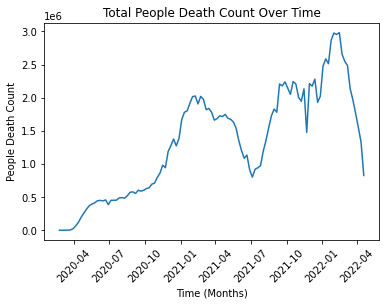

In [39]:
#create graph comparing the total death count throughout the pandemic
x = new_grouped_df["WeekDate"]
y = new_grouped_df["PEOPLE_DEATH_COUNT"]
plt.plot(x,y)
plt.title("Total People Death Count Over Time")
plt.xlabel("Time (Months)")
plt.ylabel("People Death Count")
plt.xticks(rotation = 45)
plt.show()

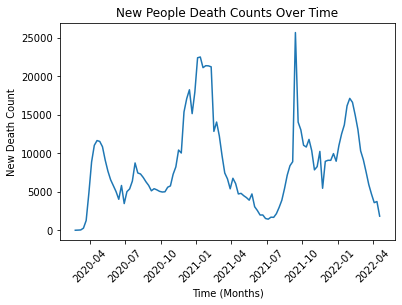

In [38]:
#create graph comparing the new people death count throughout the pandemic
x = new_grouped_df["WeekDate"]
y = new_grouped_df["PEOPLE_DEATH_NEW_COUNT"]
plt.plot(x,y)
plt.title("New People Death Counts Over Time")
plt.xlabel("Time (Months)")
plt.ylabel("New Death Count")
plt.xticks(rotation = 45)
plt.show()